In [243]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [297]:
def read_data(file_path, x_label, y_label):
    return pd.read_csv(file_path,header=None,names=[x_label,y_label])

def plot_data(df, y_predictions=[], prediction=False):
    # Create the plot
    plt.plot(df['Population'],df['Profit'],'rx', label='Training data')
    if prediction:
        plt.plot(df["Population"],y_predictions,'b',label='Linear Regression')
        plt.legend(loc='lower right')
    plt.xticks([4,6,8,10,12,14,16,18,20,22,24])
    plt.yticks([-5,0,5,10,15,20,25])
    plt.xlabel("Population of the city in 10,000s")
    plt.ylabel("Profit in $10,000s")
    
def cost_function(df, theta0, theta1):
    m = len(df)
    sum = 0
    for i in range(m):
        x = df['Population'][i]
        y = df['Profit'][i]
        sum += pow((theta0 + (theta1 * x) - y), 2)
    sum = sum / (2*m)
    return sum    

def differentiate_theta0(df, theta0, theta1):
    m = len(df)
    sum = 0
    for i in range(m):
        x = df['Population'][i]
        y = df['Profit'][i]
        sum += (theta0 + (theta1 * x) - y)
    sum = sum / m
    return sum

def differentiate_theta1(df, theta0, theta1):
    m = len(df)
    sum = 0
    for i in range(m):
        x = df['Population'][i]
        y = df['Profit'][i]
        sum += (theta0 + (theta1 * x) - y) * x
    sum = sum / m
    return sum

def gradient_descent(df, theta0, theta1, alpha, cost_difference):
    prev_cost = cost_function(df, theta0, theta1)
    tmp_theta0 = theta0 - (alpha*differentiate_theta0(df, theta0, theta1))
    tmp_theta1 = theta1 - (alpha*differentiate_theta1(df, theta0, theta1))
    theta0 = tmp_theta0
    theta1 = tmp_theta1
    cost = cost_function(df, theta0, theta1)
    if(abs(prev_cost - cost) > cost_difference):
        return gradient_descent(df, theta0, theta1, alpha, cost_difference)
    return theta0, theta1

def predict(theta0, theta1, x):
    return (theta0 + (theta1*x))

In [312]:
#constants
file_path = "../data.txt"
x_label = "Population"
y_label = "Profit"
theta0 = 0
theta1 = 0
alpha = 0.01
cost_difference = 0.00001

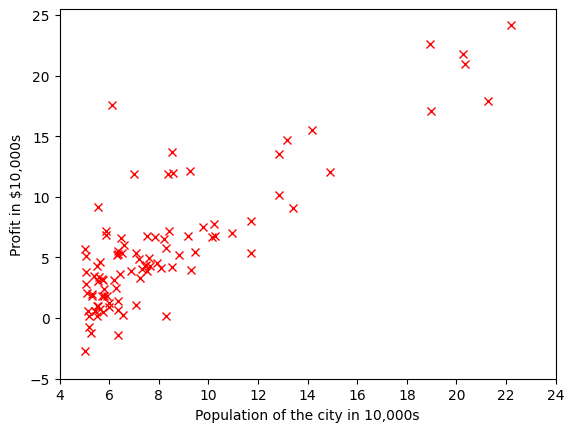

In [313]:
df = read_data(file_path, x_label, y_label)
plot_data(df)

In [314]:
#performing gradient descent for the optimal theta0 and theta1 values
theta0, theta1 = gradient_descent(df, theta0, theta1, alpha, cost_difference)

In [315]:
print(f"Theta0: {theta0}, Theta1: {theta1}")
print(f"x: {35000}, y: {predict(theta0, theta1, 3.5)}")
print(f"x: {70000}, y: {predict(theta0, theta1, 7)}")

Theta0: -3.7217231514189426, Theta1: 1.175547657550631
x: 35000, y: 0.39269365000826584
x: 70000, y: 4.507110451435475


In [316]:
y_predictions = [predict(theta0, theta1, df['Population'][i]) for i in range(len(df))]

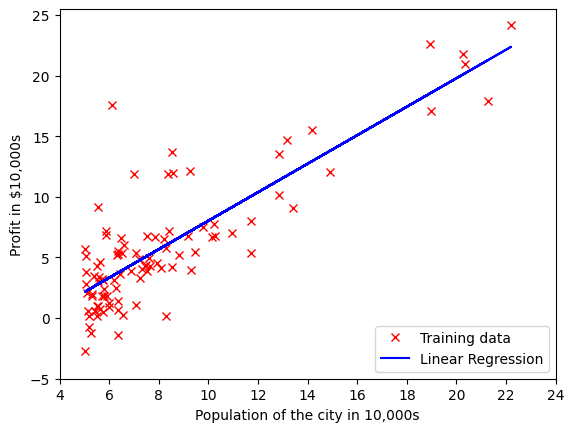

In [317]:
plot_data(df, y_predictions, True)